In [1]:
import math
import tensorflow as tf
from pandas_datareader import data as pdr
import yfinance as yfin
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from neuralprophet import NeuralProphet

c:\Users\gusta\Documents\MarketPredict\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')), '\n')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Num GPUs Available:  0 

Tue Feb 27 11:54:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P8              19W / 220W |    950MiB /  8192MiB |      9%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+

In [4]:
yfin.pdr_override()
df = pdr.get_data_yahoo("AAPL", start = "2012-01-01", end = "2024-02-26")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751306,394024400
...,...,...,...,...,...,...
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700


<function matplotlib.pyplot.show(close=None, block=None)>

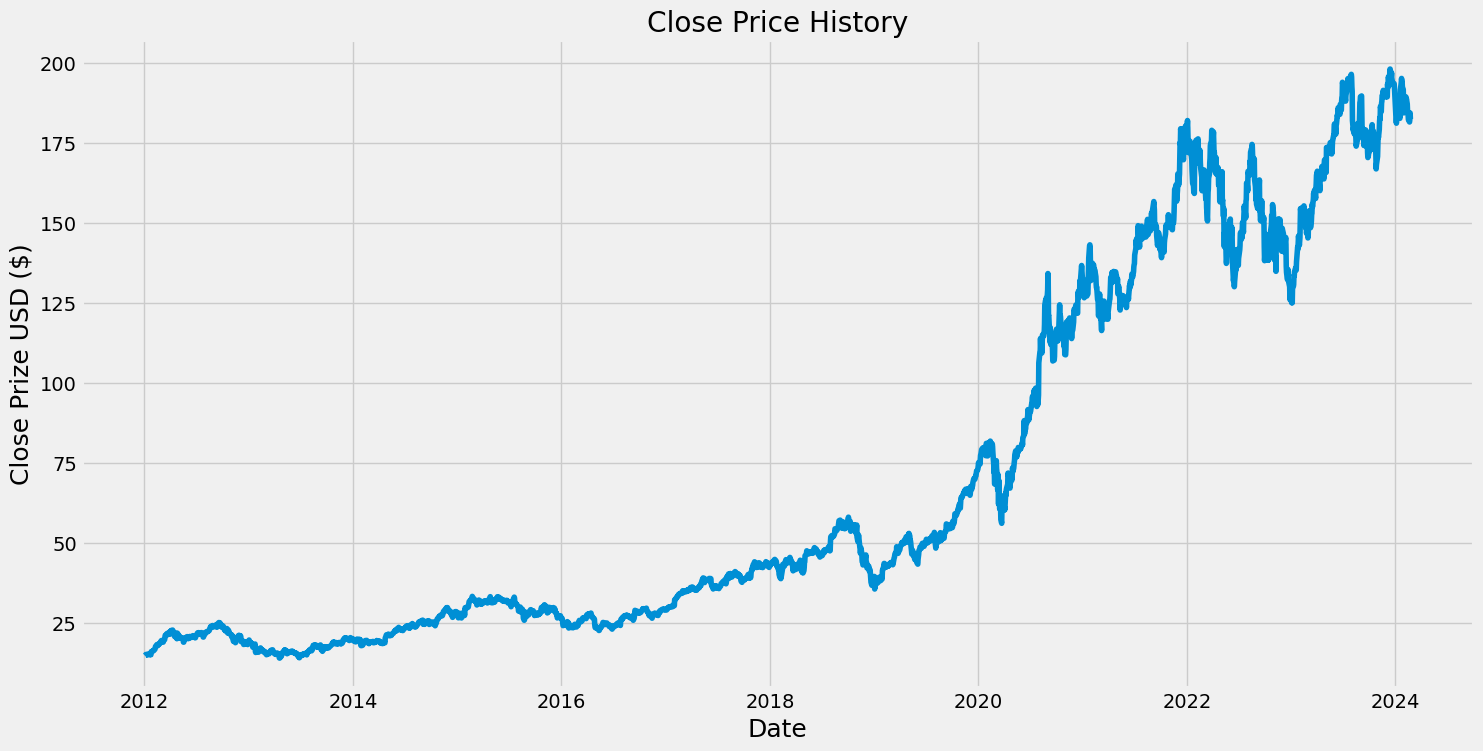

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prize USD ($)', fontsize=18)
plt.show

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2444

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.91426054],
       [0.92539195],
       [0.91534652]])

In [9]:
train_data = dataset[0:training_data_len, :]
train_data = scaler.fit_transform(train_data)
train_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.94633691],
       [0.94465552],
       [0.9255302 ]])

In [10]:
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(X_train)
        print(y_train)
        print()

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(2384, 60)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2384, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(X_train, y_train, batch_size=1, epochs=1)


2384/2384 [==============================] - 23s 9ms/step - loss: 0.0015


In [17]:
test_data = dataset[training_data_len - 60:, :]
test_data = scaler.fit_transform(test_data)
test_data

array([[1.14790075e-01],
       [1.10685505e-01],
       [1.33534021e-01],
       [1.54740793e-01],
       [1.63360370e-01],
       [1.67601682e-01],
       [2.04405654e-01],
       [2.32590049e-01],
       [2.67478583e-01],
       [2.49281815e-01],
       [2.74866642e-01],
       [2.66520759e-01],
       [2.82117959e-01],
       [3.30140867e-01],
       [3.20974112e-01],
       [2.92379280e-01],
       [2.38473107e-01],
       [2.89095582e-01],
       [2.78834261e-01],
       [2.97988852e-01],
       [3.22068677e-01],
       [3.27951943e-01],
       [2.97578416e-01],
       [2.73087946e-01],
       [2.82117959e-01],
       [2.85127963e-01],
       [2.80476214e-01],
       [3.05650605e-01],
       [3.00041033e-01],
       [3.01546035e-01],
       [2.88958840e-01],
       [2.88274710e-01],
       [2.81570780e-01],
       [2.85127963e-01],
       [3.26583684e-01],
       [3.29456946e-01],
       [3.57093953e-01],
       [3.44370015e-01],
       [2.91968844e-01],
       [2.96620593e-01],


In [18]:
X_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [19]:
X_test = np.array(X_test)

In [20]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 4ms/step


In [22]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.943013948560818

C:\Users\gusta\AppData\Local\Temp\ipykernel_19432\3722196901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

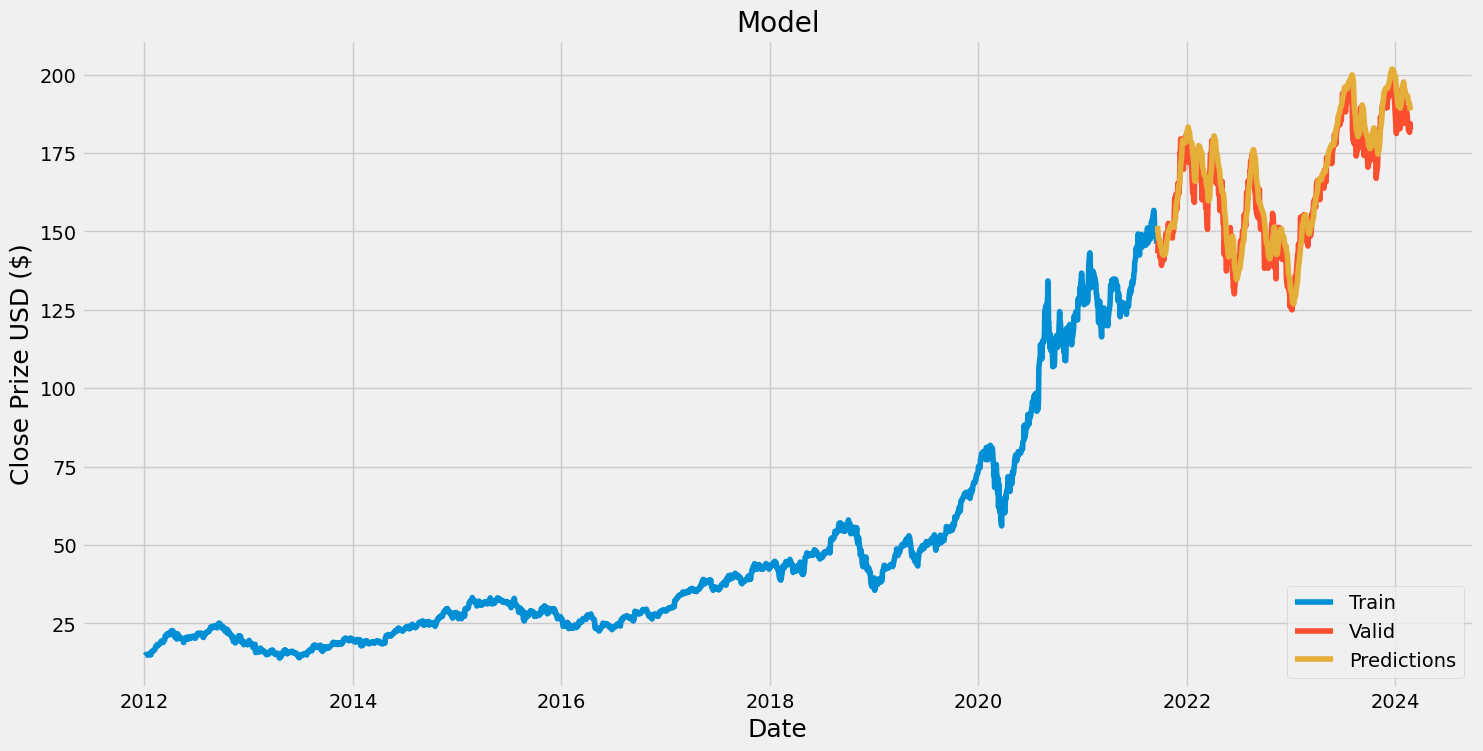

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prize USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show

In [24]:
valid

,Close,Predictions
Date,,
2021-09-20,142.940002,151.760086
2021-09-21,143.429993,150.486694
2021-09-22,145.850006,149.185104
2021-09-23,146.830002,148.217178
2021-09-24,146.919998,147.621109
...,...,...
2024-02-16,182.309998,191.487686
2024-02-20,181.559998,190.653564
2024-02-21,182.320007,189.743988


In [33]:
X_train.shape

(2384, 60, 1)

In [32]:
np.delete(X_train, -1, 1)
X_train.shape

(2384, 60, 1)

In [28]:
model2 = NeuralProphet()
model2.fit(X_train, y_train)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


ValueError: Provided DataFrame (df) must be of pd.DataFrame type.